# Import Library

In [4853]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

# Load Dataset

In [4854]:
df_train = pd.read_csv('./dataset/train_dataset.csv')
df_test = pd.read_csv('./dataset/test_dataset_no_y.csv')

In [4855]:
df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.407166,E,W,2.0,M,C,1.127628,-0.657689,-0.415323,76.124758,20.710704
1,44.417166,M,W,1.0,H,C,0.957628,-0.667689,-0.475323,85.834758,94.202404
2,28.047166,M,W,4.0,L,R,0.717628,-1.107689,-0.385323,13.814758,43.043004
3,-0.462834,NaN,W,2.0,L,C,1.717628,-1.547689,-0.425323,29.344758,7.956004
4,42.957166,M,W,3.0,M,C,0.747628,-1.847689,-0.135323,NaN,62.397804


In [4856]:
df_train['x4'].unique()

array([ 2.,  1.,  4.,  3., nan])

In [4857]:
df_test['x4']

0      2.0
1      1.0
2      1.0
3      4.0
4      4.0
      ... 
188    NaN
189    4.0
190    3.0
191    4.0
192    1.0
Name: x4, Length: 193, dtype: float64

In [4858]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      757 non-null    float64
 1   x2      760 non-null    object 
 2   x3      762 non-null    object 
 3   x4      764 non-null    float64
 4   x5      758 non-null    object 
 5   x6      761 non-null    object 
 6   x7      761 non-null    float64
 7   x8      756 non-null    float64
 8   x9      763 non-null    float64
 9   x10     758 non-null    float64
 10  y       758 non-null    float64
dtypes: float64(7), object(4)
memory usage: 68.9+ KB


In [4859]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      186 non-null    float64
 1   x2      183 non-null    object 
 2   x3      182 non-null    object 
 3   x4      180 non-null    float64
 4   x5      185 non-null    object 
 5   x6      182 non-null    object 
 6   x7      183 non-null    float64
 7   x8      187 non-null    float64
 8   x9      181 non-null    float64
 9   x10     185 non-null    float64
dtypes: float64(6), object(4)
memory usage: 15.2+ KB


# Data Cleaning

In [4860]:
df_train.describe()

,x1,x4,x7,x8,x9,x10,y
count,757.000000,764.000000,761.000000,756.000000,763.000000,758.000000,758.000000
mean,24.825200,2.463351,1.749244,-1.179051,-0.323344,59.538307,53.993730
std,20.880903,1.082431,0.861297,0.431568,0.115757,31.805305,42.823339
min,-1.642834,1.000000,0.257628,-1.917689,-0.515323,3.134758,5.120804
25%,9.977166,2.000000,1.007628,-1.557689,-0.425323,33.527258,30.710379
50%,23.217166,2.000000,1.777628,-1.202689,-0.325323,59.799758,45.788304
75%,36.107166,3.000000,2.487628,-0.797689,-0.225323,85.799758,65.293729
max,143.194213,4.000000,3.247628,-0.417689,-0.115323,117.924758,328.493593


## Cek Duplikat Data

In [4861]:
df_train.duplicated().sum()

0

In [4862]:
df_test.duplicated().sum()

0

## Cek Missing Value

In [4863]:
df_train.isna().sum()

x1     43
x2     40
x3     38
x4     36
x5     42
x6     39
x7     39
x8     44
x9     37
x10    42
y      42
dtype: int64

In [4864]:
df_train.shape

(800, 11)

In [4865]:
df_test.shape

(193, 10)

In [4866]:
df_train.isna().sum()

x1     43
x2     40
x3     38
x4     36
x5     42
x6     39
x7     39
x8     44
x9     37
x10    42
y      42
dtype: int64

In [4867]:
df_test.isna().sum()

x1      7
x2     10
x3     11
x4     13
x5      8
x6     11
x7     10
x8      6
x9     12
x10     8
dtype: int64

In [4868]:
numerical_cols = df_train.drop(['y', 'x4'], axis=1).select_dtypes(['float64']).columns

In [4869]:
categorical_cols = df_train.select_dtypes(['object']).columns.to_list()
categorical_cols.append('x4')
test_categorical_cols = df_test.select_dtypes(['object']).columns.to_list()

## Handle Missing Value Variabel Numerik

<Axes: >

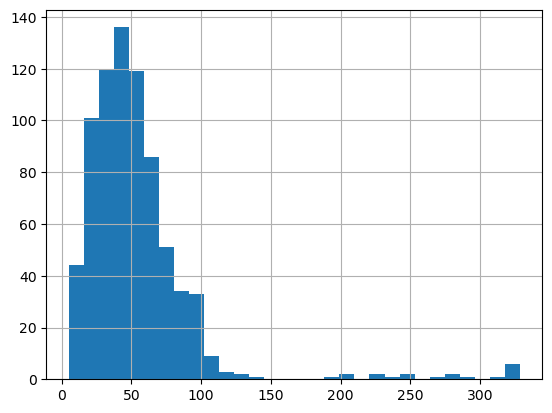

In [4870]:
df_train['y'].hist(bins=30)

In [4871]:
df_train[numerical_cols]

,x1,x7,x8,x9,x10
0,0.407166,1.127628,-0.657689,-0.415323,76.124758
1,44.417166,0.957628,-0.667689,-0.475323,85.834758
2,28.047166,0.717628,-1.107689,-0.385323,13.814758
3,-0.462834,1.717628,-1.547689,-0.425323,29.344758
4,42.957166,0.747628,-1.847689,-0.135323,NaN
...,...,...,...,...,...
795,18.237166,2.857628,-1.727689,-0.435323,82.144758
796,37.787166,2.147628,-1.747689,-0.315323,32.374758
797,36.127166,0.437628,-0.857689,-0.185323,62.894758
798,32.477166,2.447628,-1.207689,-0.465323,77.094758


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x7'}>],
       [<Axes: title={'center': 'x8'}>, <Axes: title={'center': 'x9'}>],
       [<Axes: title={'center': 'x10'}>, <Axes: >]], dtype=object)

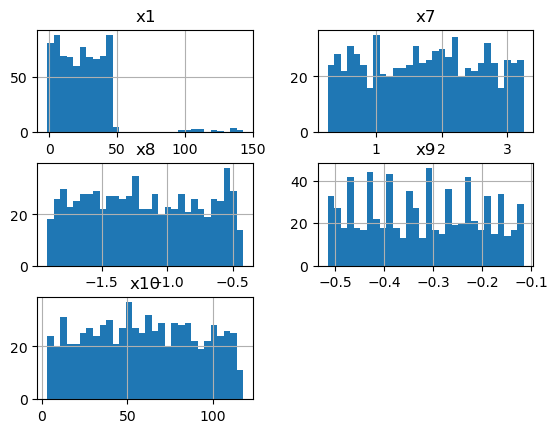

In [4872]:
df_train[numerical_cols].hist(bins=30)

## Menghapus Nilai Null pada Variabel Numerik Menggunakan Median karena distribusi data tidak normal

In [4873]:
df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].median())

In [4874]:
df_train[numerical_cols].isna().sum()

x1     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

In [4875]:
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].median())

## Handle Missing Value Variabel Kategorikal menggunakan Modus

In [4876]:
for col in categorical_cols :
    print(f'Jumlah Missing Value pada Data Training Variabel {col}: ', df_train[col].isna().sum())
print('===============================================================================')
for col in categorical_cols :
    print(f'Jumlah Missing Value pada Data Testing Variabel {col}: ', df_test[col].isna().sum())

Jumlah Missing Value pada Data Training Variabel x2:  40
Jumlah Missing Value pada Data Training Variabel x3:  38
Jumlah Missing Value pada Data Training Variabel x5:  42
Jumlah Missing Value pada Data Training Variabel x6:  39
Jumlah Missing Value pada Data Training Variabel x4:  36
Jumlah Missing Value pada Data Testing Variabel x2:  10
Jumlah Missing Value pada Data Testing Variabel x3:  11
Jumlah Missing Value pada Data Testing Variabel x5:  8
Jumlah Missing Value pada Data Testing Variabel x6:  11
Jumlah Missing Value pada Data Testing Variabel x4:  13


In [4877]:
print(df_train['x2'].value_counts())
print(df_test['x2'].value_counts())

x2
A    303
M    216
E    162
N     79
Name: count, dtype: int64
x2
A    66
M    64
E    39
N    14
Name: count, dtype: int64


In [4878]:
df_train['x2'] = df_train['x2'].fillna('A')
df_test['x2'] = df_test['x2'].fillna('A')

In [4879]:
print(df_train['x3'].value_counts())
print(df_test['x3'].value_counts())

x3
W    762
Name: count, dtype: int64
x3
W    182
Name: count, dtype: int64


In [4880]:
df_train['x3'] = df_train['x3'].fillna('W')
df_test['x3'] = df_test['x3'].fillna('W')

In [4881]:
print(df_train['x5'].value_counts())
print(df_test['x5'].value_counts())

x5
L    313
M    291
H    154
Name: count, dtype: int64
x5
L    83
M    77
H    25
Name: count, dtype: int64


In [4882]:
df_train['x5'] = df_train['x5'].fillna('L')
df_test['x5'] = df_test['x5'].fillna('L')

In [4883]:
print(df_train['x4'].value_counts())
print(df_test['x4'].value_counts())

x4
3.0    211
2.0    201
1.0    187
4.0    165
Name: count, dtype: int64
x4
4.0    53
1.0    49
2.0    40
3.0    38
Name: count, dtype: int64


In [4884]:
df_train['x4'] = df_train['x4'].fillna(3)
df_test['x4'] = df_test['x4'].fillna(4)

In [4885]:
print(df_train['x6'].value_counts())
print(df_test['x6'].value_counts())

x6
C    531
R    191
S     39
Name: count, dtype: int64
x6
C    133
R     33
S     16
Name: count, dtype: int64


In [4886]:
df_train['x6'] = df_train['x6'].fillna('C')
df_test['x6'] = df_test['x6'].fillna('C')

In [4887]:
for col in categorical_cols :
    print(f'Jumlah Missing Value pada Data Training Variabel {col}: ', df_train[col].isna().sum())
print('===============================================================================')
for col in categorical_cols :
    print(f'Jumlah Missing Value pada Data Testing Variabel {col}: ', df_test[col].isna().sum())

Jumlah Missing Value pada Data Training Variabel x2:  0
Jumlah Missing Value pada Data Training Variabel x3:  0
Jumlah Missing Value pada Data Training Variabel x5:  0
Jumlah Missing Value pada Data Training Variabel x6:  0
Jumlah Missing Value pada Data Training Variabel x4:  0
Jumlah Missing Value pada Data Testing Variabel x2:  0
Jumlah Missing Value pada Data Testing Variabel x3:  0
Jumlah Missing Value pada Data Testing Variabel x5:  0
Jumlah Missing Value pada Data Testing Variabel x6:  0
Jumlah Missing Value pada Data Testing Variabel x4:  0


In [4888]:
df_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.407166,E,W,2.0,M,C,1.127628,-0.657689,-0.415323,76.124758,20.710704
1,44.417166,M,W,1.0,H,C,0.957628,-0.667689,-0.475323,85.834758,94.202404
2,28.047166,M,W,4.0,L,R,0.717628,-1.107689,-0.385323,13.814758,43.043004
3,-0.462834,A,W,2.0,L,C,1.717628,-1.547689,-0.425323,29.344758,7.956004
4,42.957166,M,W,3.0,M,C,0.747628,-1.847689,-0.135323,59.799758,62.397804
...,...,...,...,...,...,...,...,...,...,...,...
795,18.237166,A,W,4.0,H,R,2.857628,-1.727689,-0.435323,82.144758,30.756604
796,37.787166,A,W,2.0,M,C,2.147628,-1.747689,-0.315323,32.374758,37.879104
797,36.127166,E,W,1.0,L,C,0.437628,-0.857689,-0.185323,62.894758,87.348204
798,32.477166,M,W,1.0,M,C,2.447628,-1.207689,-0.465323,77.094758,55.274904


In [4889]:
df_train = df_train.dropna()

In [4890]:
df_train.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
y      0
dtype: int64

In [4891]:
df_test.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

## One Hot Encoding

In [4892]:
df_train = pd.get_dummies(data=df_train, columns=['x2'],dtype='int64', prefix='x2_')
df_train = pd.get_dummies(data=df_train, columns=['x3'],dtype='int64', prefix='x3_')
df_train = pd.get_dummies(data=df_train, columns=['x5'],dtype='int64', prefix='x5_')
df_train = pd.get_dummies(data=df_train, columns=['x6'],dtype='int64', prefix='x6_')
df_train

,x1,x4,x7,x8,x9,x10,y,x2__A,x2__E,x2__M,x2__N,x3__W,x5__H,x5__L,x5__M,x6__C,x6__R,x6__S
0,0.407166,2.0,1.127628,-0.657689,-0.415323,76.124758,20.710704,0,1,0,0,1,0,0,1,1,0,0
1,44.417166,1.0,0.957628,-0.667689,-0.475323,85.834758,94.202404,0,0,1,0,1,1,0,0,1,0,0
2,28.047166,4.0,0.717628,-1.107689,-0.385323,13.814758,43.043004,0,0,1,0,1,0,1,0,0,1,0
3,-0.462834,2.0,1.717628,-1.547689,-0.425323,29.344758,7.956004,1,0,0,0,1,0,1,0,1,0,0
4,42.957166,3.0,0.747628,-1.847689,-0.135323,59.799758,62.397804,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,18.237166,4.0,2.857628,-1.727689,-0.435323,82.144758,30.756604,1,0,0,0,1,1,0,0,0,1,0
796,37.787166,2.0,2.147628,-1.747689,-0.315323,32.374758,37.879104,1,0,0,0,1,0,0,1,1,0,0
797,36.127166,1.0,0.437628,-0.857689,-0.185323,62.894758,87.348204,0,1,0,0,1,0,1,0,1,0,0
798,32.477166,1.0,2.447628,-1.207689,-0.465323,77.094758,55.274904,0,0,1,0,1,0,0,1,1,0,0


In [4893]:
df_test = pd.get_dummies(data=df_test, columns=['x2'],dtype='int64', prefix='x2_')
df_test = pd.get_dummies(data=df_test, columns=['x3'],dtype='int64', prefix='x3_')
df_test = pd.get_dummies(data=df_test, columns=['x5'],dtype='int64', prefix='x5_')
df_test = pd.get_dummies(data=df_test, columns=['x6'],dtype='int64', prefix='x6_')
df_test

,x1,x4,x7,x8,x9,x10,x2__A,x2__E,x2__M,x2__N,x3__W,x5__H,x5__L,x5__M,x6__C,x6__R,x6__S
0,16.787166,2.0,2.807628,-0.687689,-0.175323,103.314758,0,0,0,1,1,0,1,0,1,0,0
1,38.137166,1.0,2.197628,-0.617689,-0.195323,14.644758,0,0,1,0,1,0,0,1,1,0,0
2,20.797166,1.0,3.007628,-0.687689,-0.235323,41.574758,0,1,0,0,1,0,0,1,0,0,1
3,15.577166,4.0,0.707628,-0.827689,-0.125323,107.614758,1,0,0,0,1,0,0,1,1,0,0
4,44.677166,4.0,3.027628,-0.447689,-0.345323,92.434758,0,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,42.487166,4.0,0.907628,-0.637689,-0.355323,66.764758,1,0,0,0,1,0,0,1,0,1,0
189,-1.162834,4.0,2.697628,-1.147689,-0.435323,85.934758,0,0,1,0,1,1,0,0,1,0,0
190,-1.622834,3.0,2.217628,-0.927689,-0.305323,10.884758,1,0,0,0,1,0,1,0,0,1,0
191,2.137166,4.0,1.877628,-1.627689,-0.245323,56.104758,1,0,0,0,1,0,1,0,0,1,0


## Handle Outlier

<Axes: >

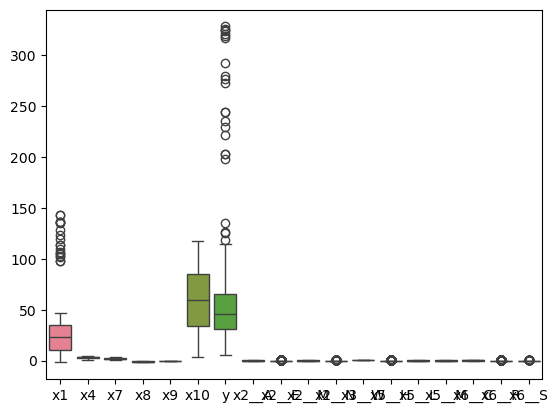

In [4894]:
sns.boxplot(df_train)

In [4895]:
# def remove_outliers_iqr(df, threshold=1.5):
#     """
#     Removes outliers from a Pandas DataFrame using the IQR method.
#     """
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
#     IQR = Q3 - Q1
    
#     lower_bound = Q1 - threshold * IQR
#     upper_bound = Q3 + threshold * IQR
    
#     # Keep only rows where all column values are within the bounds
#     filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
#     return filtered_df

# df_train = remove_outliers_iqr(df_train)

In [4896]:
def handle_outliers_fixed(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_result = df.copy()
    
    for col in numeric_cols:
        Q1 = df_result[col].quantile(0.25)
        Q3 = df_result[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        median_value = df_result[col].median()
        
        # Penggantian nilai hanya pada kolom numerik
        outlier_mask = (df_result[col] < lower_bound) | (df_result[col] > upper_bound)
        df_result[col] = df_result[col].where(~outlier_mask, median_value)

    return df_result

df_train = handle_outliers_fixed(df_train)

<Axes: >

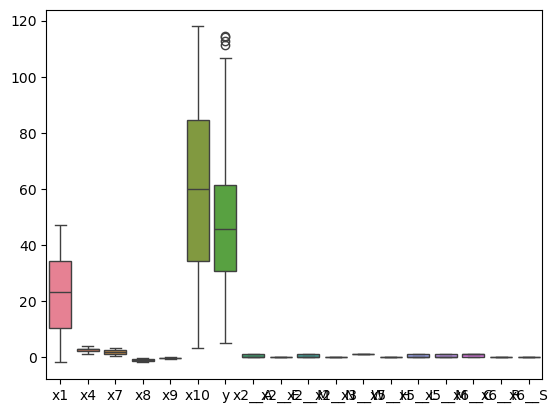

In [4897]:
sns.boxplot(df_train)

In [4898]:
df_train.isna().sum()

x1       0
x4       0
x7       0
x8       0
x9       0
x10      0
y        0
x2__A    0
x2__E    0
x2__M    0
x2__N    0
x3__W    0
x5__H    0
x5__L    0
x5__M    0
x6__C    0
x6__R    0
x6__S    0
dtype: int64

# Exploratory Data Analysis

## Cek Korelasi

## Variabel Numerik

In [4899]:
df_train[numerical_cols]

,x1,x7,x8,x9,x10
0,0.407166,1.127628,-0.657689,-0.415323,76.124758
1,44.417166,0.957628,-0.667689,-0.475323,85.834758
2,28.047166,0.717628,-1.107689,-0.385323,13.814758
3,-0.462834,1.717628,-1.547689,-0.425323,29.344758
4,42.957166,0.747628,-1.847689,-0.135323,59.799758
...,...,...,...,...,...
795,18.237166,2.857628,-1.727689,-0.435323,82.144758
796,37.787166,2.147628,-1.747689,-0.315323,32.374758
797,36.127166,0.437628,-0.857689,-0.185323,62.894758
798,32.477166,2.447628,-1.207689,-0.465323,77.094758


In [4900]:
df_numeric_corr = df_train[['x1', 'x7', 'x8', 'x9', 'x10', 'y']].corr(method='pearson')
df_numeric_corr

,x1,x7,x8,x9,x10,y
x1,1.000000,0.057823,-0.082916,0.013809,-0.035509,0.681246
x7,0.057823,1.000000,-0.010739,-0.038652,-0.008677,0.038469
x8,-0.082916,-0.010739,1.000000,0.036261,0.008642,0.355218
x9,0.013809,-0.038652,0.036261,1.000000,-0.033184,0.275007
x10,-0.035509,-0.008677,0.008642,-0.033184,1.000000,0.327125
y,0.681246,0.038469,0.355218,0.275007,0.327125,1.000000


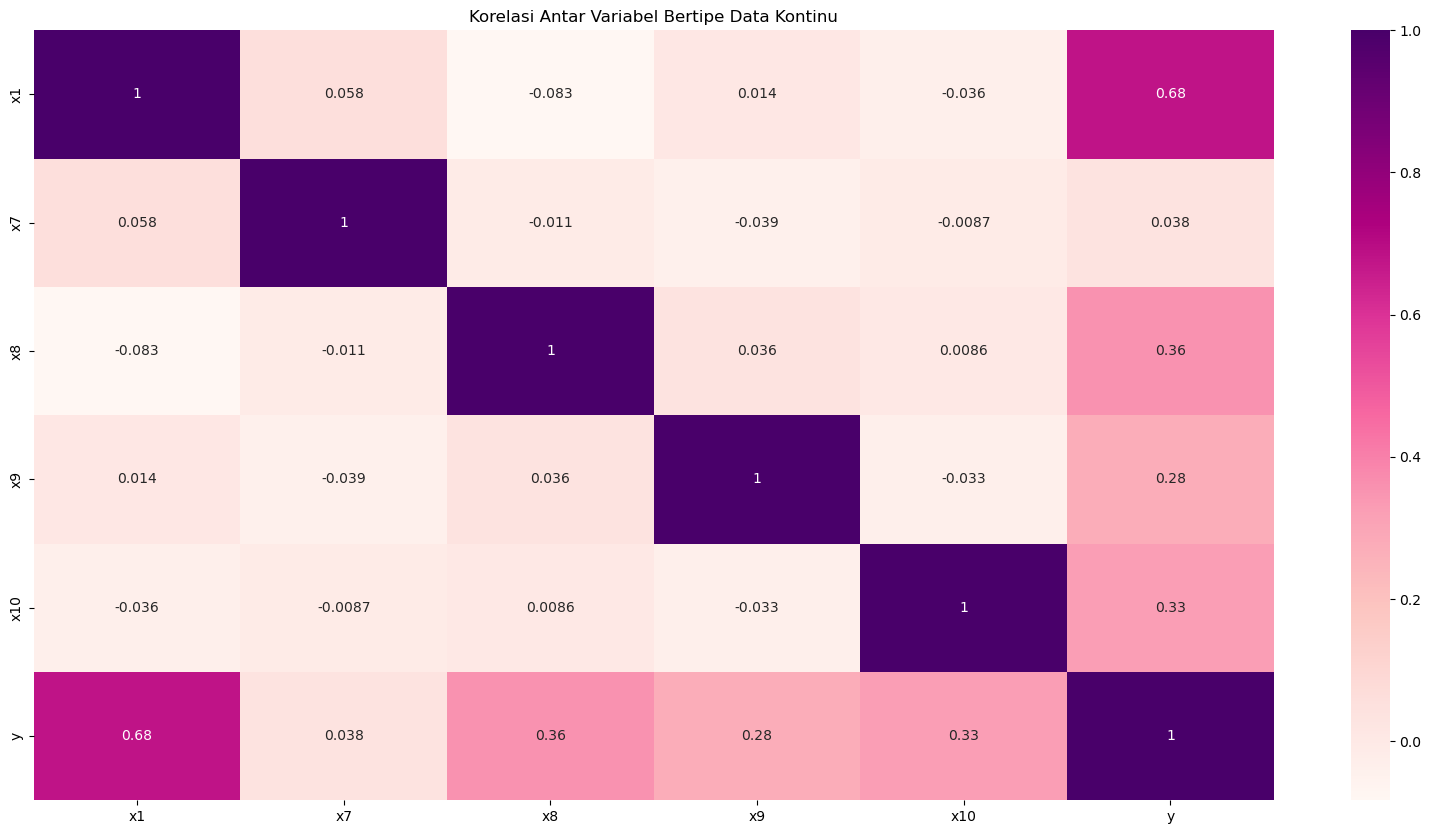

In [4901]:
plt.figure(figsize=(20, 10))
plt.title('Korelasi Antar Variabel Bertipe Data Kontinu')
sns.heatmap(df_numeric_corr, annot=True, cmap='RdPu')
plt.show()

## Variabel Kategorik

In [4902]:
df_train.describe()

,x1,x4,x7,x8,x9,x10,y,x2__A,x2__E,x2__M,x2__N,x3__W,x5__H,x5__L,x5__M,x6__C,x6__R,x6__S
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.0,758.000000,758.0,758.0,758.0,758.000000,758.000000,758.000000,758.0,758.0
mean,22.509237,2.492084,1.743433,-1.184140,-0.322566,59.283294,47.902945,0.427441,0.0,0.265172,0.0,1.0,0.0,0.439314,0.366755,0.707124,0.0,0.0
std,13.808363,1.061798,0.839429,0.420890,0.112771,31.120013,22.926218,0.495034,0.0,0.441716,0.0,0.0,0.0,0.496631,0.482237,0.455383,0.0,0.0
min,-1.642834,1.000000,0.257628,-1.917689,-0.515323,3.134758,5.120804,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,10.474666,2.000000,1.037628,-1.547689,-0.415323,34.417258,30.710379,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,23.217166,3.000000,1.777628,-1.202689,-0.325323,59.799758,45.777504,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.0,0.0
75%,34.117166,3.000000,2.407628,-0.827689,-0.235323,84.627258,61.516304,1.000000,0.0,1.000000,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.0,0.0
max,47.117166,4.000000,3.247628,-0.417689,-0.115323,117.924758,114.482004,1.000000,0.0,1.000000,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.0,0.0


## Scaling Data

In [4903]:
scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])

In [4904]:
df_train

,x1,x4,x7,x8,x9,x10,y,x2__A,x2__E,x2__M,x2__N,x3__W,x5__H,x5__L,x5__M,x6__C,x6__R,x6__S
0,-1.601686,2.0,-0.734084,1.251630,-0.823073,0.541535,20.710704,0,0,0,0,1,0,0,1,1,0,0
1,1.587617,1.0,-0.936736,1.227855,-1.355478,0.853759,94.202404,0,0,1,0,1,0,0,0,1,0,0
2,0.401321,4.0,-1.222833,0.181762,-0.556871,-1.462035,43.043004,0,0,1,0,1,0,1,0,0,0,0
3,-1.664733,2.0,-0.030761,-0.864332,-0.911807,-0.962670,7.956004,1,0,0,0,1,0,1,0,1,0,0
4,1.481814,3.0,-1.187071,-1.577578,1.661482,0.016607,62.397804,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.309587,4.0,1.328201,-1.292280,-1.000541,0.735108,30.756604,1,0,0,0,1,0,0,0,0,0,0
796,1.107156,2.0,0.481830,-1.339829,0.064268,-0.865241,37.879104,1,0,0,0,1,0,0,1,1,0,0
797,0.986860,1.0,-1.556613,0.776133,1.217811,0.116126,87.348204,0,0,0,0,1,0,1,0,1,0,0
798,0.722353,1.0,0.839451,-0.055987,-1.266744,0.572725,55.274904,0,0,1,0,1,0,0,1,1,0,0


# Modelling

In [4905]:
X = df_train.drop(['y'], axis=1)
y = df_train['y']
X_test = df_test

In [4906]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly.fit_transform(X)
X_test_poly = poly.fit_transform(X_test)

In [4907]:
from sklearn.model_selection import train_test_split

In [4908]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X_poly, 
    y, 
    test_size=0.25,
    random_state=42 
)

In [4909]:
X_constant = sm.add_constant(X_train) 

In [4910]:
model = sm.OLS(Y_train, X_constant).fit()

print("Hasil Regresi:")
print(model.summary())

Hasil Regresi:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     60.14
Date:                Sun, 14 Dec 2025   Prob (F-statistic):          5.05e-201
Time:                        16:17:30   Log-Likelihood:                -1961.4
No. Observations:                 568   AIC:                             4065.
Df Residuals:                     497   BIC:                             4373.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.6199      0.725     

In [4911]:
X_val_const = sm.add_constant(X_val)

In [4912]:
Y_val_pred = model.predict(X_val_const)

In [4913]:
df_train['y'].std()

22.926217512827744

In [4914]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mae = mean_absolute_error(Y_val, Y_val_pred)
rmse = np.sqrt(mean_squared_error(Y_val, Y_val_pred))
r_squared = r2_score(Y_val, Y_val_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

MAE: 3.9948
RMSE: 6.2980
R-squared: 0.9096


In [4915]:
df_test

,x1,x4,x7,x8,x9,x10,x2__A,x2__E,x2__M,x2__N,x3__W,x5__H,x5__L,x5__M,x6__C,x6__R,x6__S
0,-0.326722,2.0,1.203837,1.245406,1.286726,1.211554,0,0,0,1,1,0,1,0,1,0,0
1,1.092392,1.0,0.505361,1.413862,1.106248,-1.485491,0,0,1,0,1,0,0,1,1,0,0
2,-0.060181,1.0,1.432845,1.245406,0.745291,-0.666371,0,1,0,0,1,0,0,1,0,0,1
3,-0.407150,4.0,-1.200752,0.908493,1.737921,1.342346,1,0,0,0,1,0,0,1,1,0,0
4,1.527100,4.0,1.455746,1.822971,-0.247339,0.880621,0,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1.381533,4.0,-0.971743,1.365732,-0.337579,0.099825,1,0,0,0,1,0,0,1,0,1,0
189,-1.519842,4.0,1.077882,0.138406,-1.059492,0.682912,0,0,1,0,1,1,0,0,1,0,0
190,-1.550418,3.0,0.528262,0.667841,0.113617,-1.599858,1,0,0,0,1,0,1,0,0,1,0
191,-1.300494,4.0,0.138948,-1.016724,0.655052,-0.224417,1,0,0,0,1,0,1,0,0,1,0


In [4916]:
X_test = X_test_poly

In [4917]:
X_test_const = sm.add_constant(X_test)

In [4918]:
y_pred = model.predict(X_test_const)

In [4919]:
df_test['y'] = y_pred
df_test

,x1,x4,x7,x8,x9,x10,x2__A,x2__E,x2__M,x2__N,x3__W,x5__H,x5__L,x5__M,x6__C,x6__R,x6__S,y
0,-0.326722,2.0,1.203837,1.245406,1.286726,1.211554,0,0,0,1,1,0,1,0,1,0,0,74.062393
1,1.092392,1.0,0.505361,1.413862,1.106248,-1.485491,0,0,1,0,1,0,0,1,1,0,0,74.994644
2,-0.060181,1.0,1.432845,1.245406,0.745291,-0.666371,0,1,0,0,1,0,0,1,0,0,1,55.603741
3,-0.407150,4.0,-1.200752,0.908493,1.737921,1.342346,1,0,0,0,1,0,0,1,1,0,0,78.053569
4,1.527100,4.0,1.455746,1.822971,-0.247339,0.880621,0,0,1,0,1,0,1,0,1,0,0,95.553672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1.381533,4.0,-0.971743,1.365732,-0.337579,0.099825,1,0,0,0,1,0,0,1,0,1,0,92.604575
189,-1.519842,4.0,1.077882,0.138406,-1.059492,0.682912,0,0,1,0,1,1,0,0,1,0,0,25.272805
190,-1.550418,3.0,0.528262,0.667841,0.113617,-1.599858,1,0,0,0,1,0,1,0,0,1,0,10.132392
191,-1.300494,4.0,0.138948,-1.016724,0.655052,-0.224417,1,0,0,0,1,0,1,0,0,1,0,24.312966


In [4920]:
df_result = pd.DataFrame(y_pred, columns=['y'])
df_result['ID'] = df_result.index + 1
df_result = df_result.reindex(columns=['ID', 'y'])
df_result.to_csv('24083010002-submission-3.csv')

In [4921]:
df_result


,ID,y
0,1,74.062393
1,2,74.994644
2,3,55.603741
3,4,78.053569
4,5,95.553672
...,...,...
188,189,92.604575
189,190,25.272805
190,191,10.132392
191,192,24.312966


# Uji Residual

In [4922]:
residuals = model.resid

## Uji Normalitas

In [4923]:
stat, p_value = shapiro(residuals)
print(f"Uji Normalitas Shapiro-Wilk: Statistik={stat:.4f}, p-value={p_value:.4f}")
if p_value > 0.05:
    print("Residual terdistribusi normal")
else:
    print("Residual tidak normal")

Uji Normalitas Shapiro-Wilk: Statistik=0.7485, p-value=0.0000
Residual tidak normal


## Uji Multikolinearitas

In [4924]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["1/VIF"] = 1 / vif_data["VIF"]
print("\nVIF:\n", vif_data)


VIF:
    feature        VIF     1/VIF
0       x1   1.025071  0.975542
1       x4   1.006579  0.993464
2       x7   1.015980  0.984271
3       x8   1.022183  0.978299
4       x9   1.014846  0.985371
5      x10   1.008570  0.991503
6    x2__A   1.391670  0.718561
7    x2__E        NaN       NaN
8    x2__M   1.401177  0.713686
9    x2__N        NaN       NaN
10   x3__W  15.513210  0.064461
11   x5__H        NaN       NaN
12   x5__L   1.890276  0.529023
13   x5__M   1.857396  0.538388
14   x6__C   1.014164  0.986034
15   x6__R        NaN       NaN
16   x6__S        NaN       NaN


c:\Users\user\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


## Uji Heteroskedastisitas

In [4925]:
bp_test = het_breuschpagan(residuals, X_constant)
labels = ['LM Stat', 'LM p-value', 'F-stat', 'F p-value']
bp_result = dict(zip(labels, bp_test))
print("\nUji Breusch-Pagan:", bp_result)
if bp_result['F p-value'] > 0.05:
    print("Tidak ada heteroskedastisitas")
else:
    print("Ada heteroskedastisitas")


Uji Breusch-Pagan: {'LM Stat': 179.88264422414466, 'LM p-value': 0.26902300124827094, 'F-stat': 3.2906716357436316, 'F p-value': 1.0917294743866313e-14}
Ada heteroskedastisitas


## Uji Autokorelasi

In [4926]:
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f"\nDurbin-Watson: {dw_stat:.3f}")


Durbin-Watson: 2.079


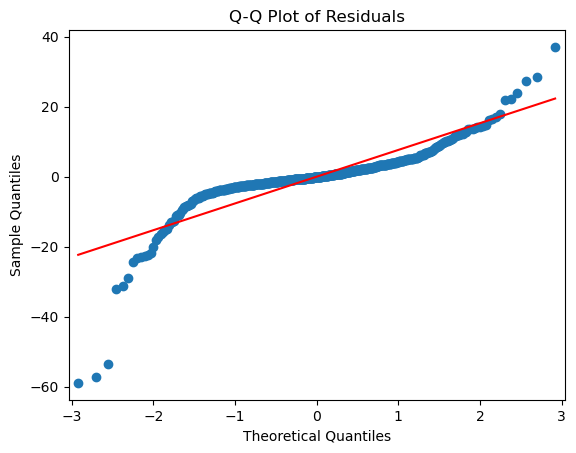

In [4927]:
fig = sm.qqplot(residuals, line='s')

# 2. Menambahkan Judul dan Label
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# 3. Menampilkan Plot
plt.show()

In [4928]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_constant, Y_train)

LinearRegression()

In [4929]:
y_pred = reg.predict(X_val)

In [4930]:
y_test_pred = reg.predict(X_test_const)

In [4931]:
y_test_pred

array([-1.00019095e+12,  7.50156250e+01, -2.14531399e+12,  7.80634766e+01,
        9.55693359e+01,  4.60224609e+01,  2.27001953e+01,  3.82451172e+01,
       -1.30347021e+12, -6.10193845e+12, -4.35247840e+11,  9.39501953e+01,
        6.85302734e+01,  1.72993076e+12, -5.20012362e+11,  8.88875495e+11,
        5.14863281e+01, -9.23396127e+11,  3.46143051e+12,  3.81435547e+01,
        6.75751953e+01,  2.55146484e+01, -2.34570312e+00,  3.93505859e+01,
        2.82099609e+01,  7.91992188e+01,  6.47652710e+11, -4.62217143e+12,
       -4.09980270e+12,  7.34658203e+01,  8.65813826e+11,  2.96471725e+12,
        1.06144195e+12, -2.74361649e+12, -3.95609436e+12, -4.69641668e+12,
        2.00400391e+01, -2.10765994e+12, -3.32068940e+12, -4.82128781e+12,
        3.39315357e+12,  1.27509766e+01,  5.38867188e+01,  8.14387097e+11,
       -1.81462999e+12, -3.80666421e+12,  6.03359375e+01,  3.76083984e+01,
       -4.05686190e+11,  5.81201172e+01,  1.56914062e+01,  5.61982422e+01,
       -2.54643235e+12,  

In [4932]:
df_sklearn = pd.DataFrame(y_test_pred, columns=['y'])
df_sklearn.to_csv('dari-sklearn.csv')

In [4933]:
df_sklearn

,y
0,-1.000191e+12
1,7.501562e+01
2,-2.145314e+12
3,7.806348e+01
4,9.556934e+01
...,...
188,5.011904e+12
189,-4.250095e+12
190,5.506825e+11
191,1.550314e+12


In [4934]:
mae = mean_absolute_error(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)
rmse = np.sqrt(mse) # RMSE perlu dihitung manual dari MSE
r2 = r2_score(Y_val, y_pred)
# Atau gunakan metode bawaan model untuk R2
r2_train_score = reg.score(X_train, Y_train)
r2_model_score = reg.score(X_val, Y_val)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"R2 Training: {r2_train_score}")
print(f"R2 via model.score(): {r2_model_score}")

Mean Absolute Error (MAE): 3.991037432846688
Mean Squared Error (MSE): 39.64901918249573
Root Mean Squared Error (RMSE): 6.296746714176752
R-squared (R2): 0.9095956144116062
R2 Training: 0.894404282027255
R2 via model.score(): 0.9095956144116062


In [4935]:
from sklearn.model_selection import cross_val_score

In [4936]:
# Tentukan metrik evaluasi yang Anda inginkan (misalnya 'r2' untuk R-squared)
# Metrik lain yang umum: 'neg_mean_squared_error', 'neg_mean_absolute_error'
scoring_metric = 'r2' 

# Tetapkan jumlah folds (K)
k_folds = 5 

# Jalankan Cross-Validation
# Model akan dilatih dan diuji sebanyak 'k_folds' kali
cv_scores = cross_val_score(
    estimator=reg, # Model yang akan diuji
    X=X,                         # Data Fitur
    y=y,                         # Data Target
    scoring=scoring_metric,      # Metrik evaluasi yang digunakan
    cv=k_folds                   # Jumlah folds (K)
)

In [4937]:
# Tampilkan semua skor untuk setiap fold
print(f"Semua Skor {scoring_metric} dari {k_folds} Folds: {cv_scores}")

# Hitung Rata-rata Skor (Estimasi Kinerja Model)
mean_cv_score = np.mean(cv_scores)
print(f"Rata-rata {scoring_metric} (Estimasi Kinerja): {mean_cv_score:.4f}")

# Hitung Standar Deviasi (Mengukur Stabilitas Model)
std_cv_score = np.std(cv_scores)
print(f"Standar Deviasi Skor: {std_cv_score:.4f}")

# Kesimpulan: Model memiliki R-squared rata-rata sekitar [mean_cv_score] dengan deviasi [std_cv_score]

Semua Skor r2 dari 5 Folds: [0.84778182 0.8340107  0.8255958  0.77618964 0.8093465 ]
Rata-rata r2 (Estimasi Kinerja): 0.8186
Standar Deviasi Skor: 0.0246


In [4938]:
from sklearn.model_selection import cross_val_score
import numpy as np
# ... (Asumsikan regressor_model, X, y, k_folds sudah didefinisikan) ...

mae_scores = cross_val_score(
    estimator=reg, 
    X=X,                         
    y=y,                         
    scoring='neg_mean_absolute_error', # Metrik untuk MAE
    cv=k_folds
)

# Ambil nilai absolut (karena ini adalah 'negatif' MAE)
mean_mae = np.mean(np.abs(mae_scores)) 
print(f"Rata-rata Mean Absolute Error (MAE): {mean_mae:.4f}")

Rata-rata Mean Absolute Error (MAE): 7.0076


In [4939]:
# Hitung MSE
mse_scores = cross_val_score(
    estimator=reg, 
    X=X,                         
    y=y,                         
    scoring='neg_mean_squared_error', # Metrik untuk MSE
    cv=k_folds
)

# 1. Ambil nilai absolut (dari 'negatif' MSE)
abs_mse_scores = np.abs(mse_scores)

# 2. Akarkan untuk mendapatkan RMSE
rmse_scores = np.sqrt(abs_mse_scores)

# 3. Hitung rata-rata
mean_rmse = np.mean(rmse_scores)
print(f"Rata-rata Root Mean Squared Error (RMSE): {mean_rmse:.4f}")

Rata-rata Root Mean Squared Error (RMSE): 9.6804
